#Machine Learning Project for Forecasting of Agricultual CO2 emissions to mitigate Climate Change

Note to Teammates:
use all the import statements for any packages in the below code block only.(To keep track of modules used)

#####The dataset contains of 6,940 rows and 29 columns, was created for a project investigating the relationship between CO2 emissions and temperature fluctuations in various countries from 1990 to 2020. The data was gathered from the FAO (Food and Agriculture Organization of the United Nations) and IPCC (Intergovernmental Panel on Climate Change). Emissions values were recorded in kilotons (kt), where 1kt equals 1000 kg.

Sure, here are paraphrased descriptions for each attribute:

1. **Savanna fires:** Emissions arising from fires occurring in savanna ecosystems.

2. **Forest fires:** Emissions resulting from fires in forested regions.

3. **Crop Residues:** Emissions generated by burning or decomposing leftover plant material after crop harvesting.

4. **Rice Cultivation:** Emissions stemming from methane released during the cultivation of rice.

5. **Drained organic soils (CO2):** Emissions derived from carbon dioxide released when draining organic soils.

6. **Pesticides Manufacturing:** Emissions originating from the production of pesticides.

7. **Food Transport:** Emissions associated with the transportation of food products.

8. **Forestland:** The extent of land covered by forests.

9. **Net Forest conversion:** Changes in forest area resulting from both deforestation and afforestation.

10. **Food Household Consumption:** Emissions arising from the consumption of food at the household level.

11. **Food Retail:** Emissions linked to the operation of retail establishments selling food.

12. **On-farm Electricity Use:** Energy consumption for electricity on farms.

13. **Food Packaging:** Emissions originating from the production and disposal of food packaging materials.

14. **Agrifood Systems Waste Disposal:** Emissions from the disposal of waste in the agrifood system.

15. **Food Processing:** Emissions associated with the processing of food products.

16. **Fertilizers Manufacturing:** Emissions originating from the production of fertilizers.

17. **IPPU:** Emissions from industrial processes and product use.

18. **Manure applied to Soils:** Emissions resulting from the application of animal manure to agricultural soils.

19. **Manure left on Pasture:** Emissions associated with animal manure on pasture or grazing land.

20. **Manure Management:** Emissions linked to the management and treatment of animal manure.

21. **Fires in organic soils:** Emissions arising from fires occurring in organic soils.

22. **Fires in humid tropical forests:** Emissions resulting from fires in humid tropical forests.

23. **On-farm energy use:** Energy consumption on farms.

24. **Rural population:** The number of people residing in rural areas.

25. **Urban population:** The number of people residing in urban areas.

26. **Total Population - Male:** The overall count of male individuals in the population.

27. **Total Population - Female:** The overall count of female individuals in the population.

28. **total_emission:** The total greenhouse gas emissions from various sources.

29. **Average Temperature °C (target):** The average temperature increase (per year) measured in degrees Celsius.

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 1000 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml

agri-food-co2-emission-dataset-forecasting-ml.zip: Skipping, found more recently modified local copy (use --force to force download)


In [1]:
#Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dataset Input from Kaggle

In [2]:
emission_data = pd.read_csv("")
emission_data

FileNotFoundError: [Errno 2] No such file or directory: '/content/agri-food-co2-emission-dataset-forecasting-ml.zip'

In [ ]:
# To check for any missing data in the dataset
emission_data.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


##Handling the missing data

On analysis of the dataset, we saw that for some countries the values of a certain were either not recorded or they are missing.

To handle this and affect the model training and predicitons we will be replacing all the null values with 0 so they dont convey any other meaning while model training.

In [ ]:
# Value imputation for null values with 0
emission_data.fillna(0,inplace = True)

In [ ]:
emission_data.isnull().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

In [ ]:
recorded_years = emission_data["Year"].unique()
print(recorded_years)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]


In [ ]:
def extract_year():
  gt_co2_data = {}
  for year in recorded_years:
      exec(f'year_{year} = emission_data.loc[emission_data["Year"] == {year}]' )
      exec(f'kt_co2_{year} = year_{year}["total_emission"].sum()')
      exec(f'gt_co2_{year} = round(kt_co2_{year}/1_000_000, 2)') # to show the total production over the year in gigatons
      gt_co2_data[year] = locals()[f'gt_co2_{year}']
  return gt_co2_data

# Line Graph to show the CO2 Emissions
def show_graph(gt_co2_data):
  years = list(gt_co2_data.keys())
  co2_values = list(gt_co2_data.values())

  plt.plot(years,co2_values, marker='o')
  plt.title("CO2 Emission Over the Years (1990-2020)")
  plt.xlabel("Years")
  plt.ylabel("Annual CO2 Emissions in Gigatons")
  plt.grid(True)
  plt.show()

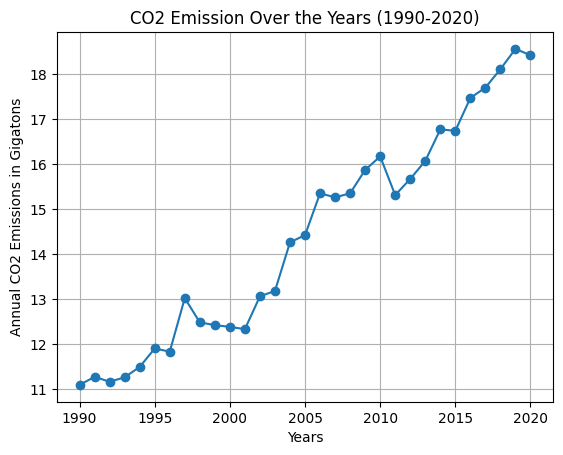

In [ ]:
co2_emissions_data = extract_year()
show_graph(co2_emissions_data)

From the above graph, we see that the highest global-combines CO2 emissions in the 3 decades is in 2019, as we see an